# **_AIRU - MÁQUINAS DE SOPORTE VECTORIAL (SVM)_**

Las máquinas de vectores de soporte (SVM) son una clase particularmente poderosa y flexible de algoritmos supervisados ​​tanto para clasificación como para regresión.
En esta sección, desarrollaremos la intuición detrás de las máquinas de vectores de soporte y su uso en problemas de clasificación.

Comenzamos con las importaciones estándar:

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## SUPPORT VECTOR MACHINE 


Encontraremos una línea o curva (en dos dimensiones) o una variedad (en múltiples dimensiones) que divide las clases entre sí.

Como ejemplo de esto, considere el caso simple de una tarea de clasificación,
en el que las dos clases de puntos están bien separadas:

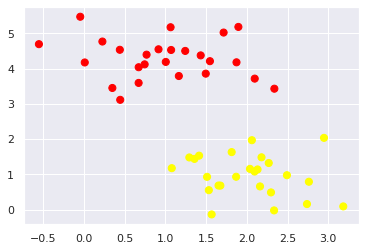

In [16]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Una manera de clasificar las clases de manera lineal sería intentar dibujar una línea recta que separa los dos conjuntos de datos y, por lo tanto, crear un modelo de clasificación. Para datos bidimensionales como el que se muestra aquí, esta es una tarea que podríamos hacer a mano.
Pero inmediatamente vemos un problema: ¡hay más de una posible línea divisoria que puede discriminar perfectamente entre las dos clases!

Podemos dibujarlos de la siguiente manera:

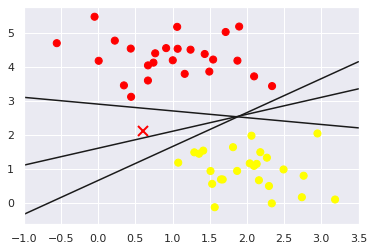

In [14]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for w, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, w * xfit + b,'-k')


plt.xlim(-1, 3.5);

Se trata de tres separadores muy diferentes que, sin embargo, discriminan perfectamente entre estas muestras. Dependiendo de cuál elija, a un nuevo punto de datos (por ejemplo, el marcado con la "X" en este gráfico) se le asignará una etiqueta diferente. Evidentemente, nuestra simple intuición de "trazar una línea divisoria entre clases" no es suficiente,
y tenemos que pensar un poco más.

## Support Vector Machines: Maximizando el *Margen*

Las máquinas de vectores de soporte ofrecen una forma de mejorar esto.
La intuición es la siguiente: en lugar de simplemente dibujar una línea de ancho cero entre las clases, podemos dibujar alrededor de cada línea un      **_margen_** de algún ancho, hasta el punto más cercano.
A continuación, se muestra un ejemplo de cómo podría verse esto:

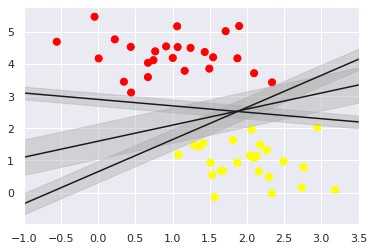

In [15]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for w, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = w * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

En máquinas de vectores de soporte, la línea que maximiza este margen es la que elegiremos como modelo óptimo.
Las máquinas de vectores de soporte son un ejemplo de un estimador de * margen máximo * de este tipo.

## **Montaje de una máquina de vectores de soporte**

Veamos el resultado de un ajuste real a estos datos: utilizaremos el clasificador de vectores de soporte de Scikit-Learn para entrenar un modelo SVM sobre estos datos.
Por el momento, usaremos un kernel lineal y estableceremos el parámetro `` C '' en un número muy grande (discutiremos el significado de estos con más profundidad momentáneamente).

In [20]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y) # con este parametro nosotros entrenamos nuestros datos 
#recordando 
#           X: contiene las caracteristicas de nuestros datos
#           y: contiene el valor de nuestro objetivo (1,0) 

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Para visualizar mejor lo que está sucediendo aquí, crearemos una función de conveniencia rápida que trazará los límites de decisión de SVM para nosotros:

In [21]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',alpha=0.2);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

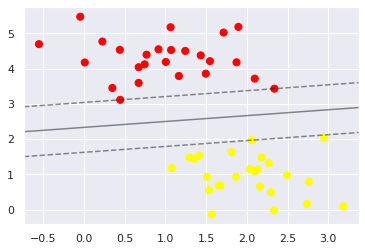

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Ésta es la línea divisoria que maximiza el margen entre los dos conjuntos de puntos. Observe que algunos de los puntos de entrenamiento pasan por las rectas punteadas. Estos puntos son los elementos fundamentales de este ajuste, y se conocen como vectores de soporte, y dan nombre al algoritmo. En Scikit-Learn,
la identidad de estos puntos se almacena en el atributo support_vectors_ del clasificador:

In [23]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Una clave del éxito de este clasificador es que para el ajuste, solo importa la posición de los vectores de soporte; ¡Cualquier punto más alejado del margen que esté en el lado correcto no modifica el ajuste! Técnicamente, esto se debe a que estos puntos no contribuyen a la función de pérdida utilizada para ajustar el modelo,
por lo que su posición y número no importan siempre que no crucen el margen.

Podemos ver esto, por ejemplo, si graficamos el modelo aprendido de los primeros 60 puntos y los primeros 120 puntos de este conjunto de datos:

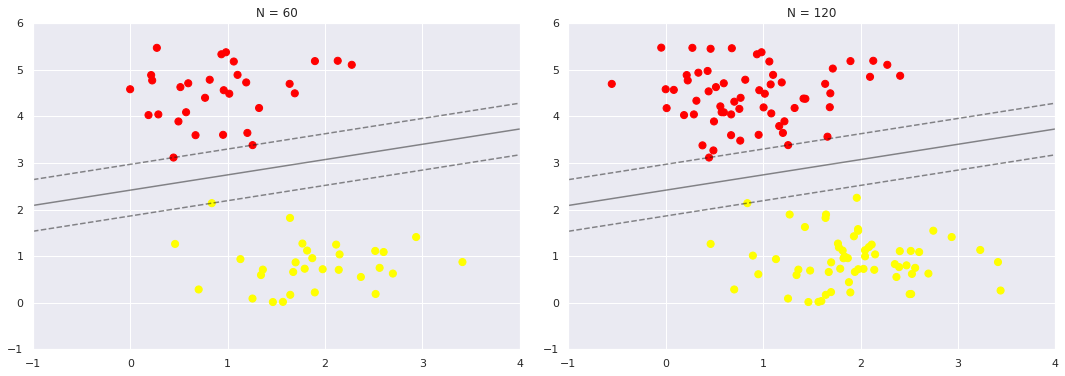

In [24]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

En el panel de la izquierda vemos el modelo y los vectores de soporte para 60 puntos de entrenamiento. En el panel derecho, hemos duplicado el número de puntos de entrenamiento, pero el modelo no ha cambiado: los tres vectores de apoyo del panel izquierdo siguen siendo los vectores de apoyo del panel derecho.
Esta insensibilidad al comportamiento exacto de puntos distantes es uno de los puntos fuertes del modelo SVM.

Usaremos los widgets interactivos de IPython para ver esta característica del modelo SVM de forma interactiva:

In [25]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[60, 100, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(60, 100, 200), value=60), Output()), _dom_classes=('w…

# Vamos más allá de los límites lineales: Truco Kernel SVM

Donde SVM se vuelve extremadamente poderoso es cuando se combina con kernels. Hemos visto las funciones kernel más usadas. Con el fin de proyectar nuestros datos en un espacio de mayor dimensión definido por polinomios y funciones de base gaussiana,
y por lo tanto fueron capaces de adaptarse a relaciones no lineales con un clasificador lineal.

En los modelos SVM, podemos usar una versión de la misma idea. Para motivar la necesidad de kernels, veamos algunos datos que no se pueden separar linealmente:

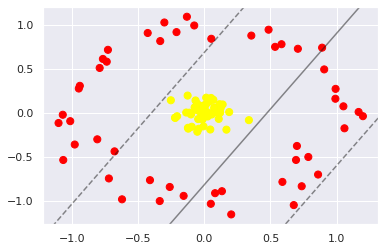

In [26]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=True);

Está claro que ninguna clasificación lineal podrá separar estos datos. Pero podemos extraer una lección de las regresiones de funciones básicas.En profundidad: regresión lineal y pensar en cómo podríamos proyectar los datos en una dimensión superior de modo que un separador lineal sería suficiente. Por ejemplo,
una proyección simple que podríamos usar sería calcular una función de base radial centrada en el grupo del medio:

In [27]:
r = np.exp(-(X ** 2).sum(1))

Podemos visualizar esta dimensión de datos adicional usando un gráfico tridimensional

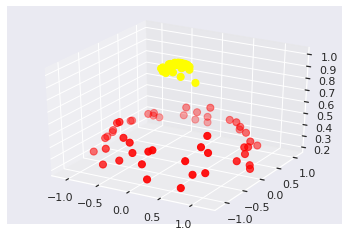

In [28]:
from mpl_toolkits import mplot3d

# Graficamos el espacio de características mapeado por el kernel
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')


Podemos ver que con esta dimensión adicional, los datos se vuelven trivialmente separables linealmente, dibujando un plano de separación en, digamos, z = 0,7.

Aquí tuvimos que elegir y ajustar cuidadosamente nuestra proyección: si no hubiéramos centrado nuestra función de base radial en la ubicación correcta, no hubiéramos visto resultados tan limpios y linealmente separables. En general,
la necesidad de hacer tal elección es un problema: nos gustaría de alguna manera encontrar automáticamente las mejores funciones básicas para usar.

Una estrategia para este fin es calcular una función base centrada en cada punto del conjunto de datos y dejar que el algoritmo SVM revise los resultados. Este tipo de transformación de función básica se conoce como transformación de kernel.
, ya que se basa en una relación de similitud (o núcleo) entre cada par de puntos.

Un problema potencial con esta estrategia —proyectar N puntos en N dimensiones— es que podría volverse muy intensiva desde el punto de vista computacional a medida que N crece. Sin embargo, debido a un pequeño y pulcro procedimiento conocido como el truco del kernel, un ajuste en el kernel-
Los datos transformados se pueden hacer implícitamente, es decir, ¡sin construir la representación completa en N de la proyección del núcleo! Este truco del kernel está integrado en SVM y es una de las razones por las que el método es tan poderoso.

En Scikit-Learn,
podemos aplicar SVM kernelizado simplemente cambiando nuestro kernel lineal a un kernel RBF (función de base radial), usando el hiperparámetro del modelo de kernel:

In [30]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

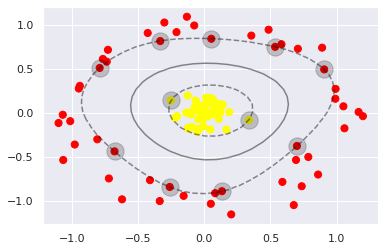

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='black', alpha=0.2);

Usando esta máquina de vectores de soporte kernelizada, aprendemos un límite de decisión no lineal adecuado. Esta estrategia de transformación del kernel se usa a menudo en el aprendizaje automático para convertir métodos lineales rápidos en métodos no lineales rápidos, especialmente para modelos en los que se puede usar el truco del kernel.

### Ajuste de la SVM: Soft Margin

Hasta ahora, nuestra discusión se ha centrado en conjuntos de datos muy limpios, en los que existe un límite de decisión perfecto.
Pero, ¿qué pasa si sus datos tienen cierta superposición?
Por ejemplo, puede tener datos como este:

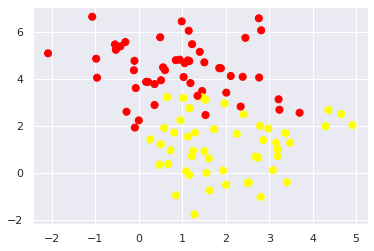

In [32]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Para manejar este caso, la implementación de SVM tiene un pequeño factor de modificación que "suaviza" el margen: es decir, permite que algunos de los puntos se introduzcan en el margen si eso permite un mejor ajuste. La dureza del margen se controla mediante un parámetro de ajuste, más a menudo conocido como $C$. Para $C$ muy grande, el margen es duro y los puntos no pueden estar en él.
Para $C$ más pequeño, el margen es más suave y puede crecer para abarcar algunos puntos.

El gráfico que se muestra a continuación ofrece una imagen visual de cómo un parámetro $C$ cambiante afecta el ajuste final, a través del ablandamiento del margen:

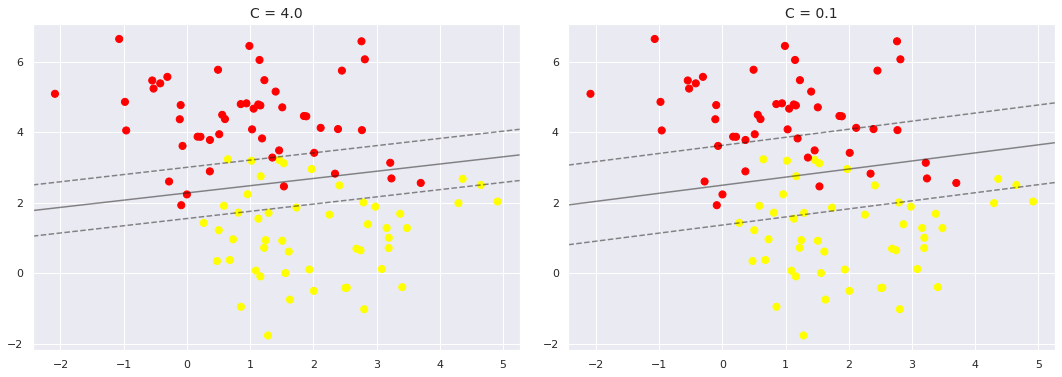

In [33]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [4, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [34]:
error = []
for C in ([0.1,0.5,0.8,1,2,3,4,5,6,8,9,10]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    print(1- model.score(X,y))
    error.append(1-model.score(X,y))

0.12
0.13
0.12
0.12
0.12
0.12
0.10999999999999999
0.10999999999999999
0.10999999999999999
0.10999999999999999
0.10999999999999999
0.10999999999999999


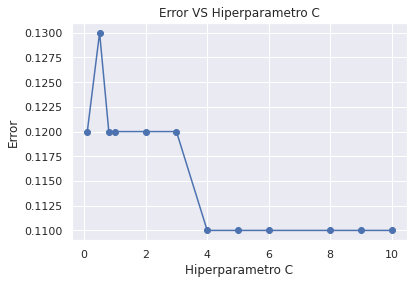

In [ ]:
C = [0.1,0.5,0.8,1,2,3,4,5,6,8,9,10]
plt.plot(C,error,marker='o')
plt.title('Error VS Hiperparametro C')
plt.xlabel('Hiperparametro C')
plt.ylabel('Error')
plt.show()

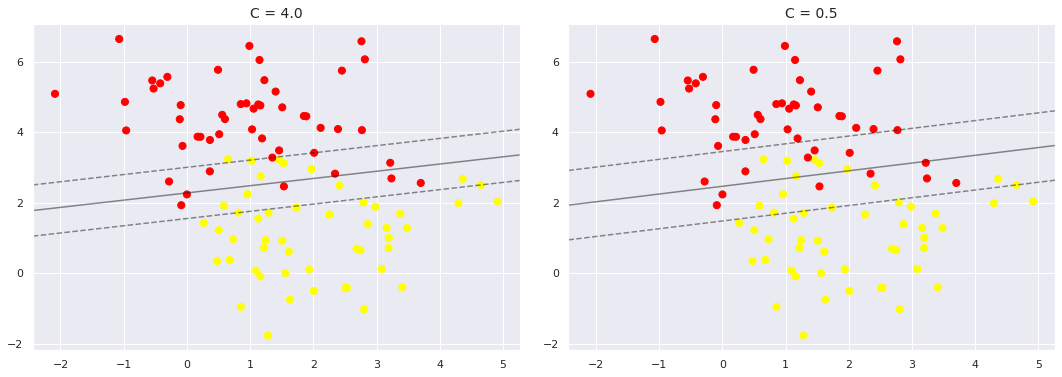

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [4, 0.5]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

El valor óptimo del parámetro $ C $ dependerá de su conjunto de datos y debe ajustarse mediante validación cruzada o un procedimiento similar 

## Resumen Maquina de Soporte Vectorial

Hemos visto aquí una breve introducción intuitiva a los principios detrás de las máquinas de vectores de soporte.
Estos métodos son un método de clasificación poderoso por varias razones:

- Su dependencia de relativamente pocos vectores de soporte significa que son modelos muy compactos y ocupan muy poca memoria.
- Una vez entrenado el modelo, la fase de predicción es muy rápida.
- Debido a que solo se ven afectados por puntos cercanos al margen, funcionan bien con datos de alta dimensión, incluso datos con más dimensiones que muestras, lo cual es un régimen desafiante para otros algoritmos.
- Su integración con los métodos del kernel los hace muy versátiles, capaces de adaptarse a muchos tipos de datos.

Sin embargo,
Las SVM también tienen varias desventajas:

- La escala con el número de muestras $ N $ es $\mathcal  [N ^ 3] $ en el peor de los casos, o $\mathcal [N ^ 2] $ para implementaciones eficientes. Para un gran número de muestras de formación, este coste computacional puede resultar prohibitivo.
- Los resultados dependen en gran medida de una elección adecuada para el parámetro de regulación $ C $.
Esto debe elegirse cuidadosamente a través de la validación cruzada, que puede ser costosa a medida que los conjuntos de datos aumentan de tamaño.


Con esos rasgos en mente,
En general, solo recurro a las SVM una vez que se ha demostrado que otros métodos más simples, rápidos y menos intensivos en ajustes son insuficientes para mis necesidades.
Sin embargo, si tiene los ciclos de CPU para comprometerse con el entrenamiento y la validación cruzada de una SVM en sus datos, el método puede generar excelentes resultados.

## Example: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.
A fetcher for the dataset is built into Scikit-Learn:

In [35]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

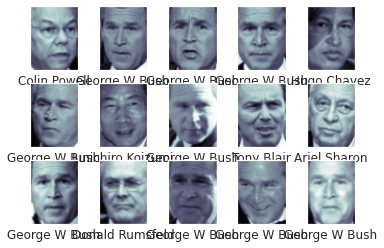

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis (see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)) to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [37]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca,svc)

For the sake of testing our classifier output, we will split the data into a training and testing set:

In [40]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finally, we can use a grid search cross-validation to explore combinations of parameters.
Here we will adjust ``C`` (which controls the margin hardness) and ``gamma`` (which controls the size of the radial basis function kernel), and determine the best model:

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 7s, sys: 36.4 s, total: 1min 44s
Wall time: 1min 3s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [42]:
model = grid.best_estimator_
ypredict = model.predict(Xtest)

In [ ]:
ypredict

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 7, 2, 3, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 3, 2, 5, 4,
       7, 3, 4, 1, 1, 5, 4, 1, 3, 3, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 7, 7, 3, 3, 1, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 2, 3, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 2, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 7, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 0, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 7, 3, 4, 5, 6, 3, 7, 3,
       3, 2, 3, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 1, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 7, 7, 2, 3, 1, 3, 4,
       3, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 4, 3, 1, 4, 1, 4, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 2, 2, 3, 6, 3, 1, 1, 5, 1,

Let's take a look at a few of the test images along with their predicted values:

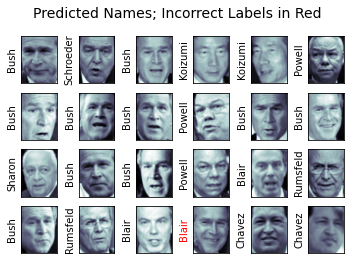

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[ypredict[i]].split()[-1],
                   color='black' if ypredict[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s
face in the bottom row was mislabeled as Blair).
We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredict,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



We might also display the confusion matrix between these classes:

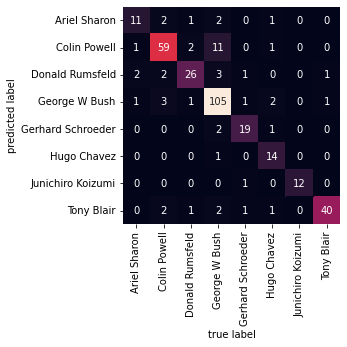

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypredict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

This helps us get a sense of which labels are likely to be confused by the estimator.

For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation.
For this kind of application, one good option is to make use of [OpenCV](http://opencv.org), which, among other things, includes pre-trained implementations of state-of-the-art feature extraction tools for images in general and faces in particular.